In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['weatherAUS.csv']))

In [ ]:
print(df)

              Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0       2008-12-01   Albury     13.4  ...     21.8         No            No
1       2008-12-02   Albury      7.4  ...     24.3         No            No
2       2008-12-03   Albury     12.9  ...     23.2         No            No
3       2008-12-04   Albury      9.2  ...     26.5         No            No
4       2008-12-05   Albury     17.5  ...     29.7         No            No
...            ...      ...      ...  ...      ...        ...           ...
145455  2017-06-21    Uluru      2.8  ...     22.4         No            No
145456  2017-06-22    Uluru      3.6  ...     24.5         No            No
145457  2017-06-23    Uluru      5.4  ...     26.1         No            No
145458  2017-06-24    Uluru      7.8  ...     26.0         No            No
145459  2017-06-25    Uluru     14.9  ...     20.9         No           NaN

[145460 rows x 23 columns]


In [ ]:
print(df.shape)

(145460, 23)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
print(df.describe(exclude=[object]))

             MinTemp        MaxTemp  ...        Temp9am       Temp3pm
count  143975.000000  144199.000000  ...  143693.000000  141851.00000
mean       12.194034      23.221348  ...      16.990631      21.68339
std         6.398495       7.119049  ...       6.488753       6.93665
min        -8.500000      -4.800000  ...      -7.200000      -5.40000
25%         7.600000      17.900000  ...      12.300000      16.60000
50%        12.000000      22.600000  ...      16.700000      21.10000
75%        16.900000      28.200000  ...      21.600000      26.40000
max        33.900000      48.100000  ...      40.200000      46.70000

[8 rows x 16 columns]


In [ ]:
print(df.describe(include=[object]))

              Date  Location WindGustDir  ... WindDir3pm RainToday RainTomorrow
count       145460    145460      135134  ...     141232    142199       142193
unique        3436        49          16  ...         16         2            2
top     2015-10-13  Canberra           W  ...         SE        No           No
freq            49      3436        9915  ...      10838    110319       110316

[4 rows x 7 columns]


In [ ]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
for each_feature in categorical_features:
   unique_values = len(df[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [ ]:
df.drop('Date', axis=1, inplace=True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
df[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)

In [ ]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

In [ ]:
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

In [ ]:
numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

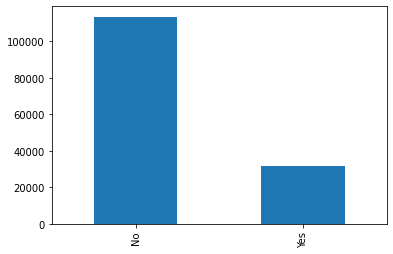

In [ ]:
df['RainTomorrow'].value_counts().plot(kind='bar')

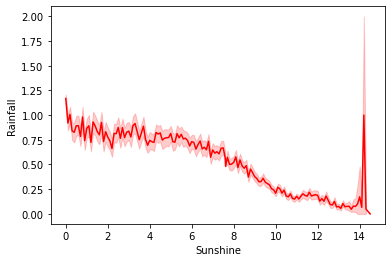

In [ ]:
sns.lineplot(data=df,x='Sunshine',y='Rainfall',color='red')

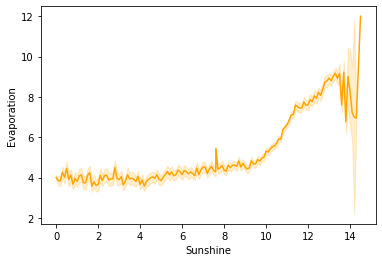

In [ ]:
sns.lineplot(data=df,x='Sunshine',y='Evaporation',color='orange')

In [ ]:
def encode_data(feature_name):


    mapping_dict = {}

    unique_values = list(df[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict




df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

df['Location'].replace(encode_data('Location'), inplace = True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


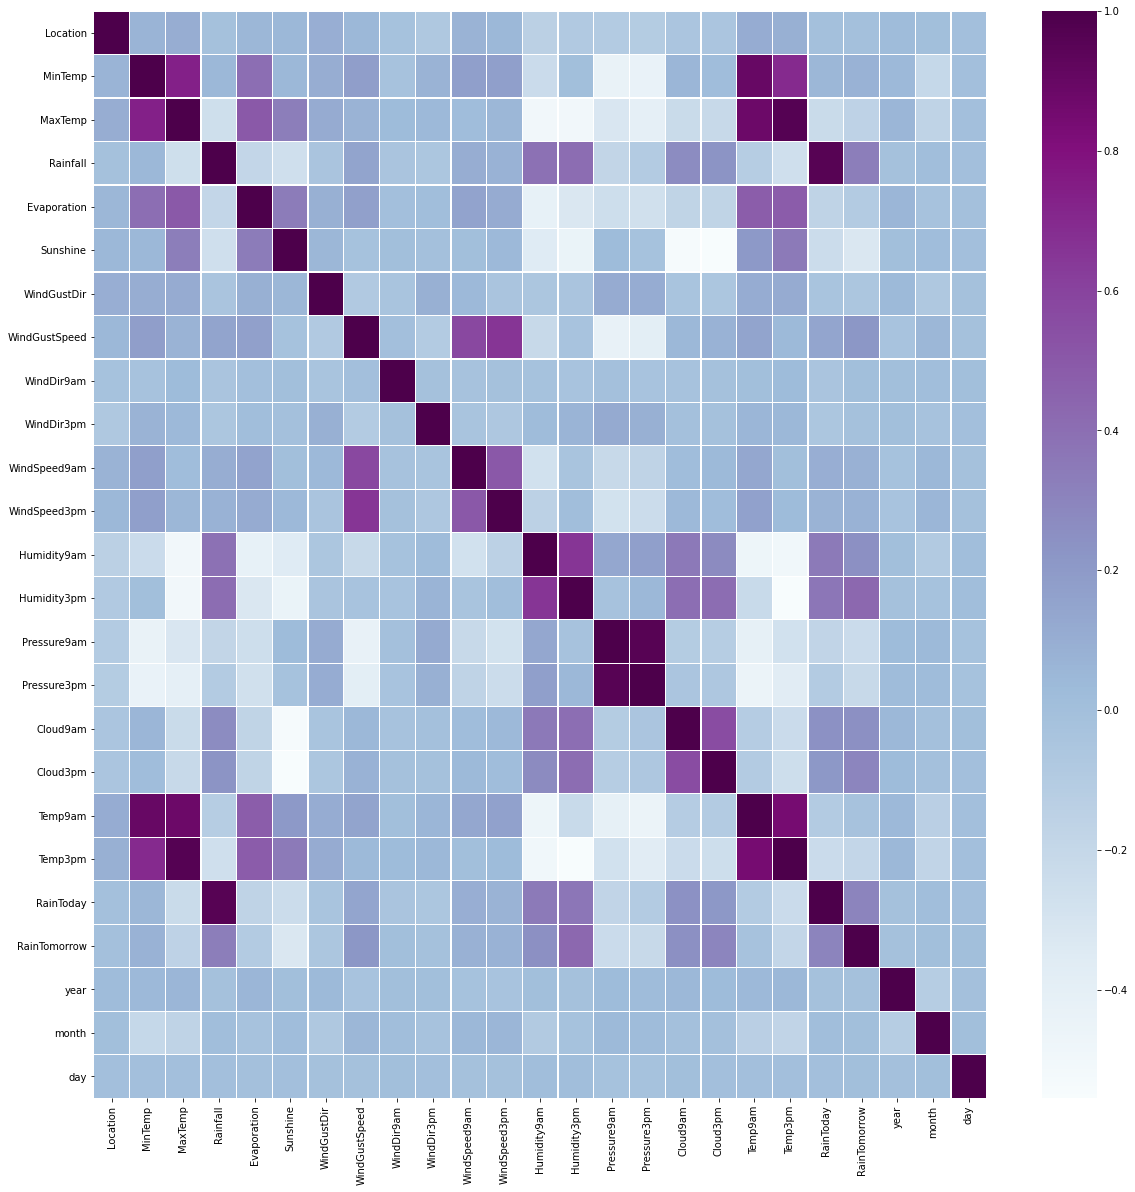

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), linewidths=0.25, annot=False, fmt=".2f", cmap = 'BuPu')

In [ ]:
X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [ ]:
X.shape

(145460, 24)

In [ ]:
y.shape

(145460,)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.03458302, 0.03005631, 0.02882744, 0.04310192, 0.02352132,
       0.04293884, 0.03006914, 0.05634575, 0.03077448, 0.03174561,
       0.03093547, 0.03239255, 0.0373738 , 0.19968153, 0.03571465,
       0.05037135, 0.02396825, 0.03618893, 0.0281056 , 0.02859921,
       0.05123154, 0.03068463, 0.03010265, 0.032686  ])

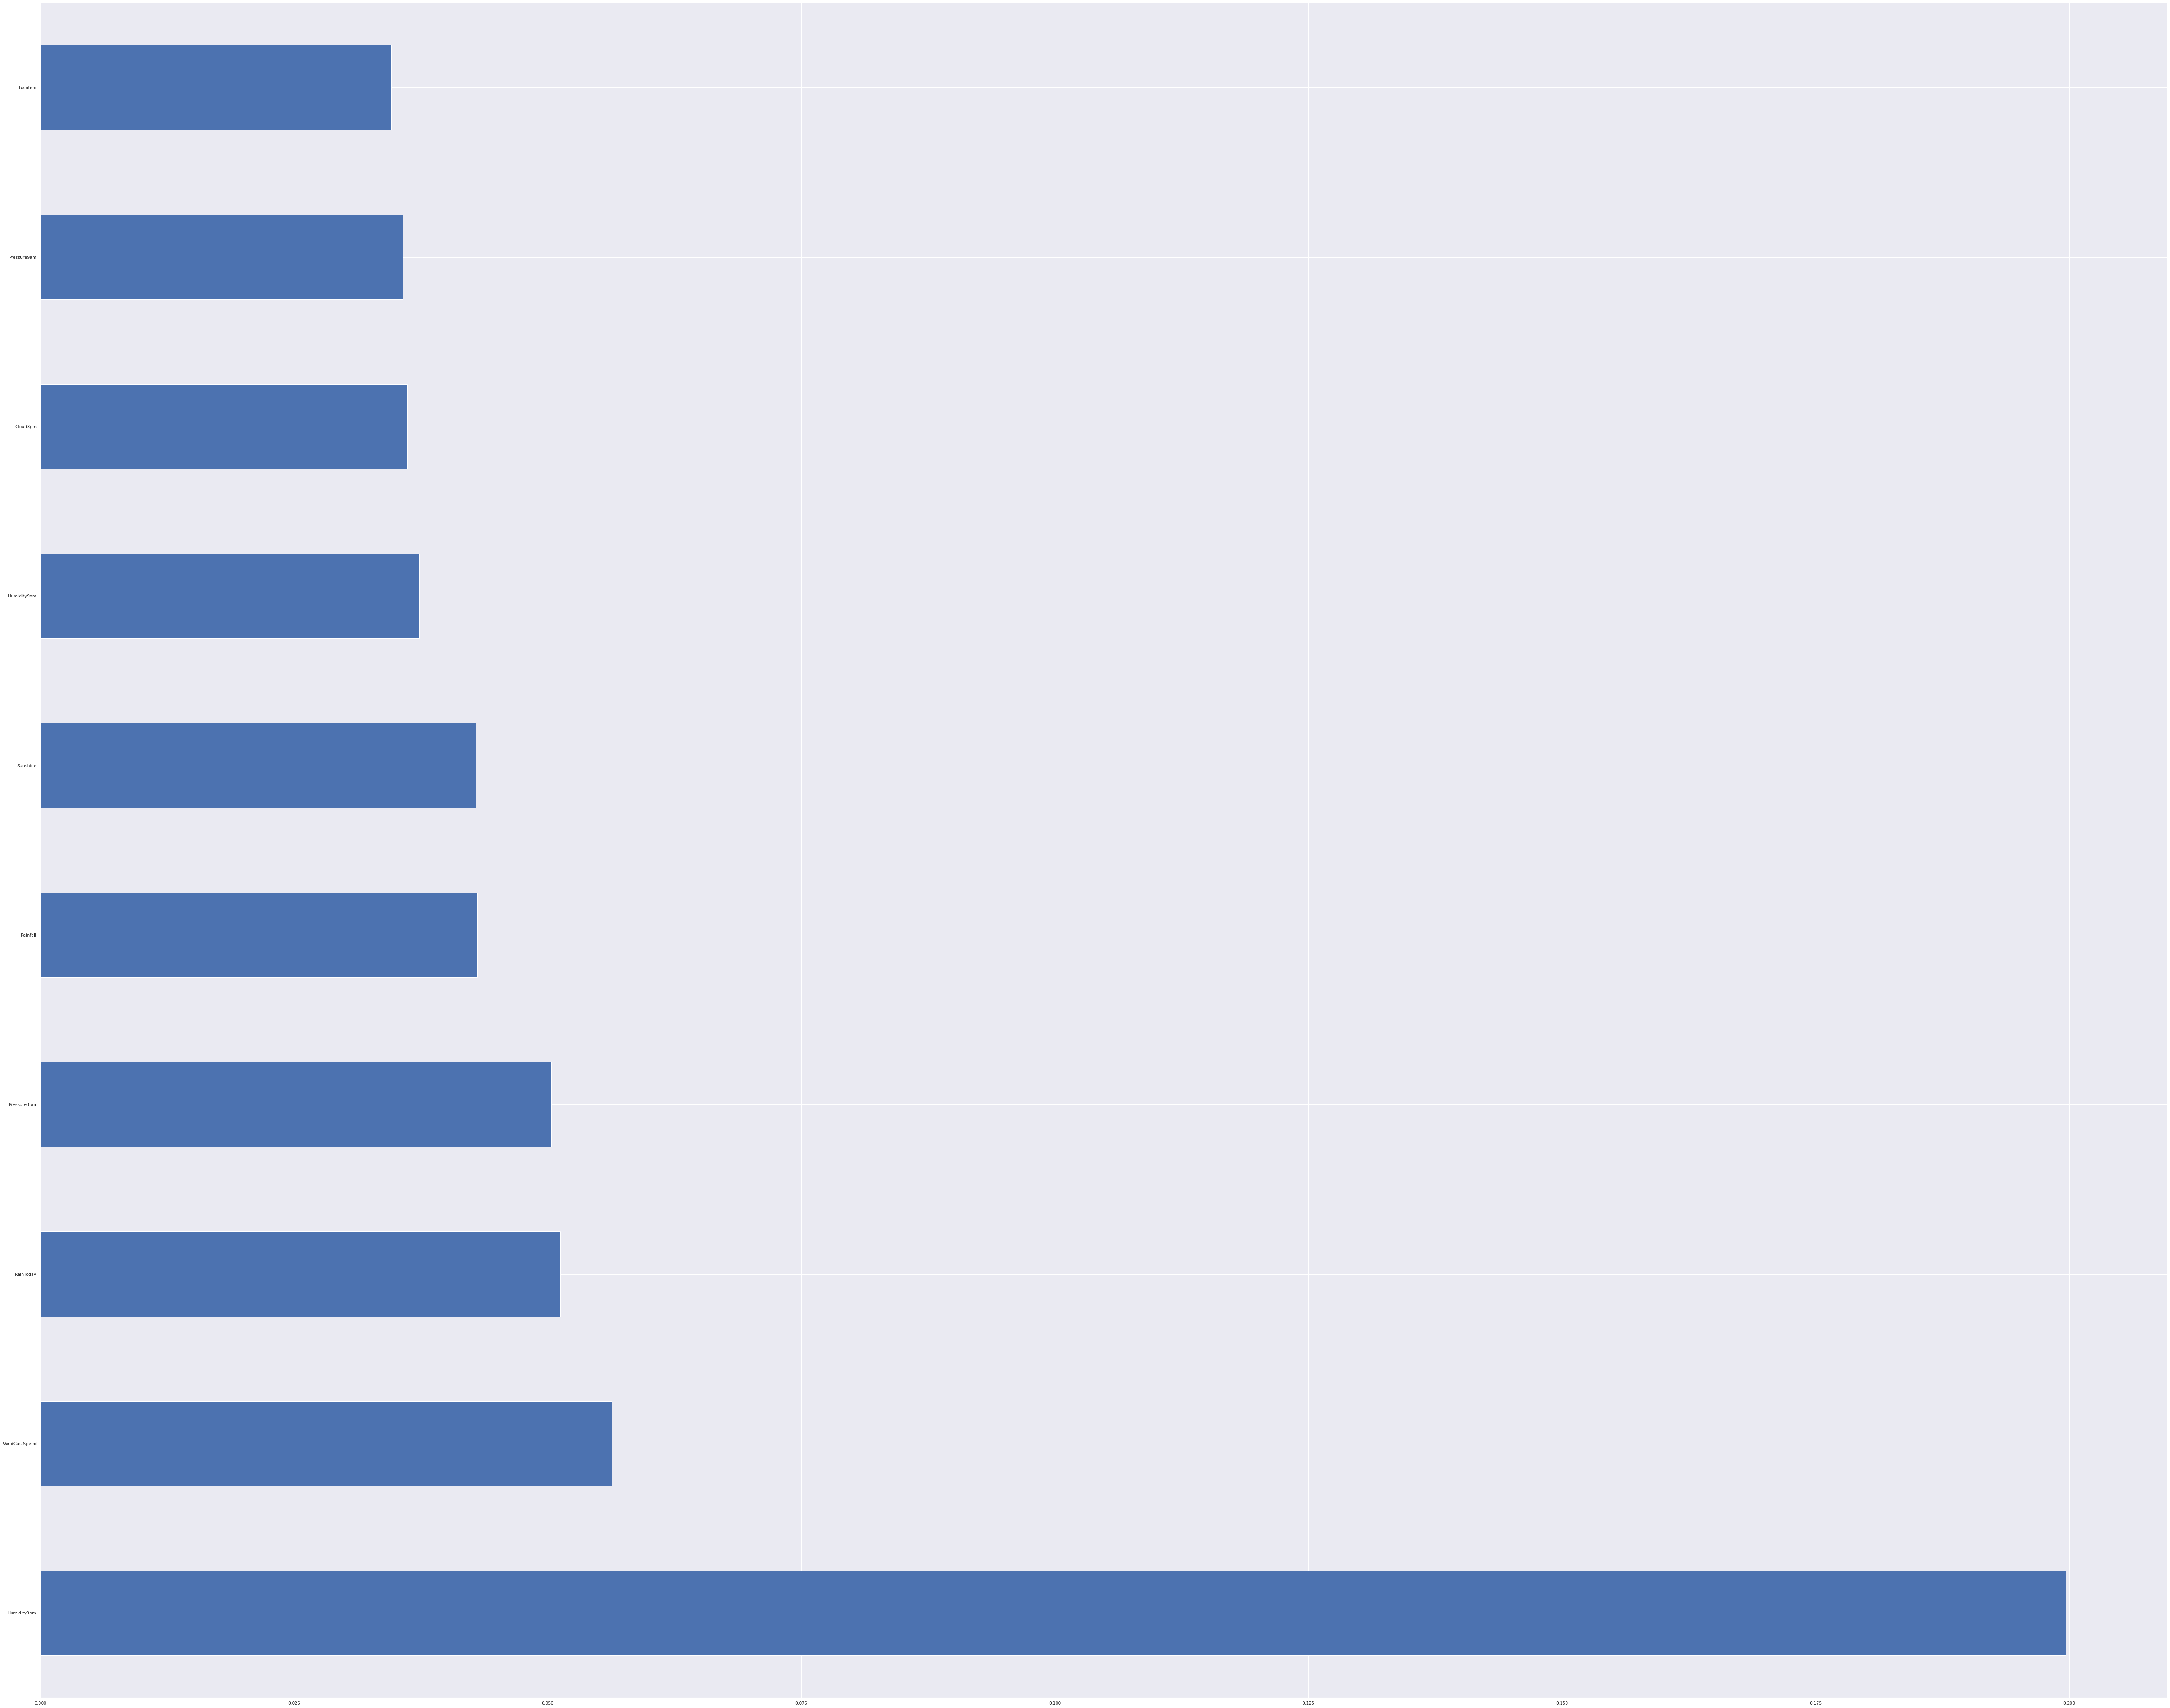

In [ ]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 116368
Length of Testing Data: 29092


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(9, activation = "relu"))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=1000, epochs=80)

Epoch 1/40
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3367 - accuracy: 0.8543
Epoch 2/40
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3370 - accuracy: 0.8546
Epoch 3/40
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3369 - accuracy: 0.8537
Epoch 4/40
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3368 - accuracy: 0.8539
Epoch 5/40
1164/1164 [==============================] - 9s 7ms/step - loss: 0.3365 - accuracy: 0.8541
Epoch 6/40
1164/1164 [==============================] - 9s 7ms/step - loss: 0.3362 - accuracy: 0.8540
Epoch 7/40
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3365 - accuracy: 0.8543
Epoch 8/40
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3359 - accuracy: 0.8540
Epoch 9/40
1164/1164 [==============================] - 8s 7ms/step - loss: 0.3364 - accuracy: 0.8543
Epoch 10/40
1164/1164 [==============================] - 8s 7ms/step - loss: 0.337

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
y_preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8443558366561253


In [ ]:
print(model.evaluate(X_train, y_train))
print(model.evaluate(X_test, y_test))

3637/3637 [==============================] - 6s 2ms/step - loss: 0.3346 - accuracy: 0.8529
[0.33463168144226074, 0.8528547286987305]
910/910 [==============================] - 1s 1ms/step - loss: 1845.1290 - accuracy: 0.7812
[1845.1290283203125, 0.7811769843101501]
